In [1]:
execfile('pysrc/RPC_Hydro.py')
import os

In [2]:
print log(0.5*1e46/(4*pi*300e18**2*36*un.eV.to('erg')*3e10))
lng=2.5

3.407383485230724


In [3]:
RPC = Cloudy.Grid('RPC',emissionLines=Cloudy.emissionLines[:1],
                                colDenss=[23],
                            savelevel=1,
                            ns=[3.4-4],Us=[4.],notCartesian='nU',
                            dusties=[True],Zs=[1.],ps=[True],
                            aEUVs=[-1.6])

In [17]:
RPC.loadAll()
m = RPC[()]
logEs = log(m.nus(False)/u.ld.Rydbergnu)
logOpacities = log(m.grainOpacities)
chimes_dir = '/home/jonathan/Dropbox/other_repositories/rpc_hydro/forCHIMES/'
np.savez(chimes_dir+'grainOpacities',logEs=logEs,logOpacities=logOpacities)


progress:  100% 1 seconds passed


In [6]:
RPC.writeinputfiles()

In [7]:
RPC.run()

Grid.run()
module name: my_utils
parent process: 5414
process id: 5535
running: RPC process id: 9688
# of models to run: 1


ending: RPC process id: 9688


In [8]:
RPC.loadAll()

progress:  100% 1 seconds passed


In [9]:
RPC('CloudyOk')

progress:  100% 0 seconds passed


{(): True}

In [10]:
m = RPC.values()[0]

In [20]:
np.savez(pyobjDir+'static_solution', taus= m.Nion('HI')*10**-17.2 + m.localColumnDensity()*2e-21, ns=m.nH)

In [21]:
m.Nion('HI')*10**-17.2 + m.localColumnDensity()*2e-21

array([1.47332987e-05, 7.42563945e-05, 1.53091725e-04, 2.36297289e-04,
       3.02325662e-04, 3.53914364e-04, 4.05482721e-04, 4.75418717e-04,
       5.71544824e-04, 6.76262520e-04, 7.43759960e-04, 7.84590168e-04,
       8.24424675e-04, 8.77639523e-04, 9.49322006e-04, 1.04710872e-03,
       1.15002818e-03, 1.23463764e-03, 1.29906143e-03, 1.36070528e-03,
       1.44371349e-03, 1.55676447e-03, 1.65356045e-03, 1.72024286e-03,
       1.77504941e-03, 1.84812662e-03, 1.94635554e-03, 2.08014618e-03,
       2.19739086e-03, 2.28041689e-03, 2.34957669e-03, 2.44194649e-03,
       2.56641659e-03, 2.68907842e-03, 2.77424635e-03, 2.84031901e-03,
       2.92821786e-03, 3.04600310e-03, 3.20473709e-03, 3.42201565e-03,
       3.56989335e-03, 3.64969755e-03, 3.72342368e-03, 3.82116787e-03,
       3.95151340e-03, 4.12673373e-03, 4.29376018e-03, 4.42566962e-03,
       4.53106798e-03, 4.67143028e-03, 4.85952358e-03, 5.11425987e-03,
       5.32512821e-03, 5.45682958e-03, 5.54647147e-03, 5.66506707e-03,
      

In [3]:
AbsorbedSpectra = Cloudy.Grid('AbsorbedSpectra', 
                            emissionLines=Cloudy.emissionLines[:1],
                            colDenss=[23],
                            savelevel=2,
                            ns=lng-arange(-10,5.1),Us=arange(-10,5.1),notCartesian='nU',
                            dusties=[True],Zs=[1.],ps=[False],
                            aEUVs=[-1.6])

In [4]:
AbsorbedSpectra.writeinputfiles()

In [5]:
AbsorbedSpectra.run()

Grid.run()
module name: my_utils
parent process: 21069
process id: 26625
# of models to run: 1


running: AbsorbedSpectra process id: 26678
ending: AbsorbedSpectra process id: 26678


In [4]:
AbsorbedSpectra.loadAll()

progress:  100% 344 seconds passed


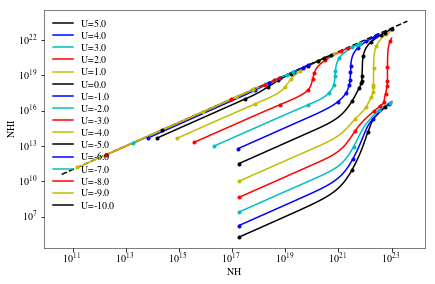

In [13]:
u.figure()
[u.plot(m.localColumnDensity(),m.Nion('HI'),'-',label='U=%.1f'%m.U,c='kbcry'[im%5]) for im,(k,m) in enumerate(sorted(AbsorbedSpectra.items()))]
[u.plot(m.localColumnDensity()[::30],m.Nion('HI')[::30],'.',c='kbcry'[im%5]) for im,(k,m) in enumerate(sorted(AbsorbedSpectra.items()))]
u.loglog()
u.mylegend()
u.ylabel('NHI')
u.xlabel('NH')
u.plotLine(c='k',ls='--',zorder=-10)
# u.xlim(1e14,1e15)
# u.ylim(1e14,1e15)

In [ ]:
spectra = [Cloudy.SED(m.spectrumEnergies, m.allSpectra[i,:],waveunit='rydberg',intensityunit='nuFnu',
                     k=(log(m.localColumnDensity()[i]),log(m.Nion('HI'))[i]))
            for m in u.Progress(AbsorbedSpectra.values()) for i in range(0,m.allSpectra.shape[0],30)]

In [28]:
u.send(spectra,'data/AbsorbedSpectra.pckl')

In [5]:
lng=2.5; spectra = u.pickle.load(file('data/AbsorbedSpectra.pckl'))

In [6]:
FromAbsorbedSpectra  = Cloudy.Grid('FromAbsorbedSpectra', 
                                   emissionLines=Cloudy.emissionLines[:7], #BPT lines
                                   colDenss=[12],
                                   savelevel=0,
                                   electronTemps=arange(2.,7.6,.5),
                                   ns=lng-arange(-10,5.1),
                                   Us=[None],nuFnus=[1.2175],nuFnu_freq=10000.,
                                   dusties=[True],Zs=[1.],ps=[False],
                                   SEDs=spectra, 
                                   SEDkeyfunc = lambda sed: tuple(map(lambda v: u.nSignificantDigits(v,5),sed.key)), 
                                   SEDstrfunc = lambda sed: '%.3f_%.3f'%(sed.key[0],sed.key[1]),
                                   )


In [7]:
[k for k in FromAbsorbedSpectra.keys() if k[0]==-2.5 and k[-1]==7]

[(-2.5, (11.178, 11.175), 7.0),
 (-2.5, (12.249, 12.237), 7.0),
 (-2.5, (13.285, 13.239), 7.0),
 (-2.5, (13.831, 13.673), 7.0),
 (-2.5, (14.175, 13.673), 7.0),
 (-2.5, (14.375, 14.373), 7.0),
 (-2.5, (14.906, 13.633), 7.0),
 (-2.5, (15.558, 13.298), 7.0),
 (-2.5, (15.894, 15.892), 7.0),
 (-2.5, (16.331, 13.004), 7.0),
 (-2.5, (16.966, 16.954), 7.0),
 (-2.5, (17.136, 17.134), 7.0),
 (-2.5, (17.218, 12.77), 7.0),
 (-2.5, (17.251, 11.499), 7.0),
 (-2.5, (17.253, 5.2574), 7.0),
 (-2.5, (17.253, 6.2443), 7.0),
 (-2.5, (17.253, 7.3898), 7.0),
 (-2.5, (17.253, 8.6315), 7.0),
 (-2.5, (17.253, 10.004), 7.0),
 (-2.5, (17.468, 16.952), 7.0),
 (-2.5, (17.757, 17.723), 7.0),
 (-2.5, (17.802, 17.801), 7.0),
 (-2.5, (17.83, 17.822), 7.0),
 (-2.5, (17.848, 17.723), 7.0),
 (-2.5, (17.85, 16.552), 7.0),
 (-2.5, (18.217, 18.213), 7.0),
 (-2.5, (18.246, 18.227), 7.0),
 (-2.5, (18.343, 18.011), 7.0),
 (-2.5, (18.378, 18.314), 7.0),
 (-2.5, (18.584, 18.582), 7.0),
 (-2.5, (18.606, 18.596), 7.0),
 (-2.5, (18

In [4]:
FromAbsorbedSpectra.writeinputfiles()

pysrc/Cloudy.py:610: RuntimeWarning: divide by zero encountered in log10
  ys = log(self.Fnus(r))[s:e]


In [95]:
import time
print time.ctime()
FromAbsorbedSpectra.run(5,filterFunc=lambda k,l=bad_no_error_keys: k in l)

Wed Mar 28 23:22:52 2018
Grid.run()
module name: my_utils
parent process: 9611
process id: 20759
# of models to run: 19
running: FromAbsorbedSpectra_n-2.5_S21.461_19.800_t6.0 process id: 27961
running: FromAbsorbedSpectra_n-2.5_S21.461_19.800_t5.5 process id: 27960
running: FromAbsorbedSpectra_n-2.5_S21.461_19.800_t4.5 process id: 27958
running: FromAbsorbedSpectra_n-2.5_S21.461_19.800_t5.0 process id: 27959


running: FromAbsorbedSpectra_n-2.5_S21.461_19.800_t4.0 process id: 27957
ending: FromAbsorbedSpectra_n-2.5_S21.461_19.800_t4.5 process id: 27958
running: FromAbsorbedSpectra_n-2.5_S22.308_15.322_t7.0 process id: 28065
ending: FromAbsorbedSpectra_n-2.5_S21.461_19.800_t5.0 process id: 27959
ending: FromAbsorbedSpectra_n-2.5_S21.461_19.800_t6.0 process id: 27961
running: FromAbsorbedSpectra_n-2.5_S22.758_16.295_t5.5 process id: 28074
running: FromAbsorbedSpectra_n-2.5_S22.998_22.919_t6.5 process id: 28078
ending: FromAbsorbedSpectra_n-2.5_S21.461_19.800_t4.0 process id: 27957
running: FromAbsorbedSpectra_n-2.5_S22.998_22.919_t7.0 process id: 28085
ending: FromAbsorbedSpectra_n-2.5_S21.461_19.800_t5.5 process id: 27960
running: FromAbsorbedSpectra_n-2.5_S22.998_22.919_t7.5 process id: 28091
ending: FromAbsorbedSpectra_n-2.5_S22.308_15.322_t7.0 process id: 28065
running: FromAbsorbedSpectra_n-1.5_S22.940_21.878_t6.5 process id: 28098
ending: FromAbsorbedSpectra_n-2.5_S22.758_16.295_t5.5 pro

In [4]:
runtimes = sorted([(os.path.getmtime(m.iofilename(isinput=False)),k) 
                   for k,m in u.Progress(FromAbsorbedSpectra.items())])
newrunks = [x[1] for x in runtimes if x[0]>1521837115]
print time.ctime()
print len(newrunks), '/', len(FromAbsorbedSpectra)

progress:  99% 0 seconds passed
Thu Mar 29 00:00:03 2018
21888 / 21888


In [4]:
problems = []
for k in u.Progress(FromAbsorbedSpectra.keys()):
    m = FromAbsorbedSpectra[k]    
    fn = m.iofilename(isinput=False)
    ls = u.filelines(fn)
    for l in ls:
        if 'W-Maximum temperature of grain' in l:
            problems.append((k,l,0))
        elif 'W-' in l:
            problems.append((k,l,0.5))
        if 'The energies MUST be in increasing order' in l:
            problems.append((k,l,1))
        if 'line too long to be read' in l:
            problems.append((k,l,2))
        if 'PROBLEM  qheat did not converge grain' in l:
            problems.append((k,l,3.5))
        elif 'PROBLEM' in l:
            problems.append((k,l,3))
        if 'please rescale' in l:
            problems.append((k,l,4))    

progress:  99% 153 seconds passed


In [5]:
problemgroups = u.group(lambda x: x[0], problems)
successDic = dict([(k, (FromAbsorbedSpectra[k].CloudyOk(), 
                        sorted(unique([x[2] for x in problemgroups.get(k,[])]))))
          for k in u.Progress(FromAbsorbedSpectra.keys())])
u.out( u.mifkad([(x[0],str(x[1])) for x in successDic.values()]).items() )

progress:  99% 37 seconds passed
((True, '[3]'), 60)
((True, '[3.0, 3.5]'), 45)
((False, '[]'), 14)
((False, '[3]'), 48)
((True, '[]'), 15714)
((False, '[3.0, 3.5]'), 4)
((False, '[0, 3]'), 114)
((False, '[0.0, 3.5]'), 1140)
((False, '[0]'), 3679)
((True, '[3.5]'), 1070)


In [97]:
tmps=[x for x in problems if x[2]==3]
res = []
for tmp in u.Progress(tmps):
    res.append((tmp[0][-1],tmp[1][:30]))
u.out(u.mifkad(res).items())

progress:  99% 0 seconds passed
((7.0, ' PROBLEM atom_levelN found neg'), 2)
((6.0, ' PROBLEM DISASTER\n'), 1)
((4.0, ' PROBLEM negative ion populati'), 16)
((2.0, ' PROBLEM negative ion populati'), 105)
((6.0, '          > PROBLEM DISASTER P'), 1)
((3.0, ' PROBLEM  ConvFail 2,  ionizat'), 2)
((3.0, ' PROBLEM  ConvFail 3,  ionizat'), 2)
((3.0, ' PROBLEM negative ion populati'), 136)
((5.5, ' PROBLEM  ConvFail 1, a grain '), 160)
((5.5, ' PROBLEM  charge/temperature n'), 160)
((7.5, ' PROBLEM atom_levelN found neg'), 49)
((3.5, ' PROBLEM negative ion populati'), 105)
((3.0, ' PROBLEM  ConvFail 1,  ionizat'), 4)
((7.0, ' PROBLEM in dBase_solve, atom_'), 2)
((7.5, ' PROBLEM in dBase_solve, atom_'), 49)
((2.5, ' PROBLEM negative ion populati'), 205)


In [94]:
bad_no_error_keys = [k for k in successDic.keys() if successDic[k]==(False,[])]

In [6]:
badkeys = [k for k in FromAbsorbedSpectra.keys() if successDic[k][0]==False 
           and (successDic[k][1]==[] or (3 in successDic[k][1] and 0 not in successDic[k][1]))]

In [7]:
len(badkeys)

66

In [8]:
for k in u.Progress(FromAbsorbedSpectra.keys()):
    if k not in badkeys:
        FromAbsorbedSpectra[k].loadAll(requireNoWarnings=False)

progress:  99% 3892 seconds passed


In [36]:
reload(pp.Table)

<module 'Table' from 'pysrc/Table.py'>

In [37]:
notloaded = pp.Table.OutputTables(FromAbsorbedSpectra,lng=lng)

progress:  99% 16 seconds passed
3.0 6.0 23.0 15.0 24.0 : instead of log NH=23 took log NH=22.5
3.0 6.5 23.0 15.0 24.0 : instead of log NH=23 took log NH=22.5
3.0 7.0 23.0 15.0 24.0 : instead of log NH=23 took log NH=22.5
3.0 7.5 23.0 15.0 24.0 : instead of log NH=23 took log NH=22.5
4.0 6.5 23.0 15.0 24.0 : instead of log NH=23 took log NH=22.5
4.0 7.0 23.0 15.0 24.0 : instead of log NH=23 took log NH=22.5
4.0 7.5 23.0 15.0 24.0 : instead of log NH=23 took log NH=22.5
5.0 6.5 23.0 15.0 24.0 : instead of log NH=23 took log NH=22.5
5.0 7.0 23.0 15.0 24.0 : instead of log NH=23 took log NH=22.5
5.0 7.5 23.0 15.0 24.0 : instead of log NH=23 took log NH=22.5


In [4]:
##split table
fn = 'output_table_Namekata14.txt'
# remove units and make each column header one word
headers = string.split(u.filelines('data/'+fn)[0])
vals = np.loadtxt('data/'+fn,skiprows=1)
for i in range(4,vals.shape[1]):
    header = string.join(headers[:4] + [headers[i]],'\t')
    np.savetxt('data/%s_table.txt'%(headers[i]),vals.take([0,1,2,3,i],axis=1), 
               fmt='%.4g', header=header,delimiter='\t')
    

In [10]:
len(notloaded)

66

In [ ]:
pp.Table.lineEmissionTable(Cloudy.emissionLines[:7],
                            FromAbsorbedSpectra3,AbsorbedSpectra_NH_NHI,spectrum_lng=lng,
                            lngDic = {1.2175:lng, -1.2175: lng-2, -3.2175:lng-4})

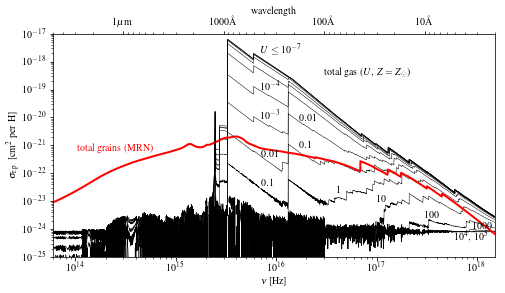

In [5]:
ret_nus, ret_grainOpacities = opacities(AbsorbedSpectra,lng)
u.mysavefig('opacities')

Figure 1: opacities
* many features in the gas opacity when it drops below 10^-23 is because we calculate gas opacity from total opacity - dust opacity, while the output includes only 2 digits after the dot. For the shown runs, run also models without grains and take the total opacities
* why is Lya opacity so low?
* verify this is sigma_radiation pressure
* T-dependence? note this is for T=T_equilibirum

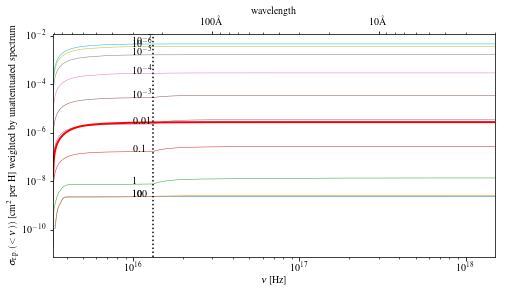

In [45]:
execfile('pysrc/RPC_Hydro.py')
opacities_weighted(AbsorbedSpectra,lng)
u.mysavefig('opacities_spectrum_averaged')

In [29]:
m = AbsorbedSpectra[(4.5,-2)]
m.dnus(True).shape, m.nus(True).shape
m.gasOpacitiesSingleZone?

Signature: m.gasOpacitiesSingleZone(iZone, onlyIonizing=True)
Docstring: <no docstring>
File:      ~/Dropbox/otherRepositories/rpc_hydro/pysrc/Cloudy.py
Type:      instancemethod


In [16]:
for k in labelDic.keys():
    newk,iZone = to_key_and_zone(k[0],k[1],AbsorbedSpectra)
    new_lNH = log(AbsorbedSpectra[newk].localColumnDensity()[iZone])
    new_lNHI = log(AbsorbedSpectra[newk].Nion('HI')[iZone])
    print k,':',(newk[1],iZone),'%.2f'%new_lNH, '%.2f'%new_lNHI


(17.5, 17.5) : (-6.0, 21) 17.55 17.41
(19.0, 19.0) : (-5.0, 108) 19.01 18.91
(21.0, 0.0) : (5.0, 15) 20.95 9.33
(21.0, 17.0) : (-1.0, 33) 21.06 16.92
(17.0, 0.0) : (-2.0, 1) 17.03 13.70
(22.0, 0.0) : (5.0, 48) 21.91 12.90
(22.0, 21.0) : (0.0, 187) 21.96 20.92
(23.0, 23.0) : (0.0, 297) 22.98 22.90


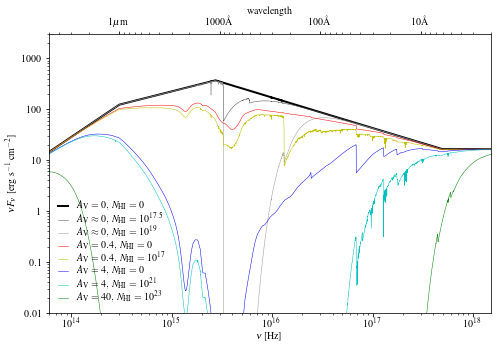

In [69]:
spectra(AbsorbedSpectra,lng,labelDic,cs)
# u.mysavefig('spectra')

Figure 2: incident spectra
* remove emission from spectrum, since we disregard emission in our calculation (use 'attenuated' instead of 'transmitted')
* need better sampling between N_HI ~ 10^17 and N_HI ~ 10^21
* use round A_V values

In [94]:
dustOptOpacityTable, dustIonOpacityTable, gasIonOpacityTable, fHITable, netCoolingTable = [
    pp.Table.Table(('U0','T','NH','NHI'),projectDir+'data/output_table_Namekata14.txt',firstLine=1,calculatedValueColumn=i)
    for i in (0,1,2,3,6)]

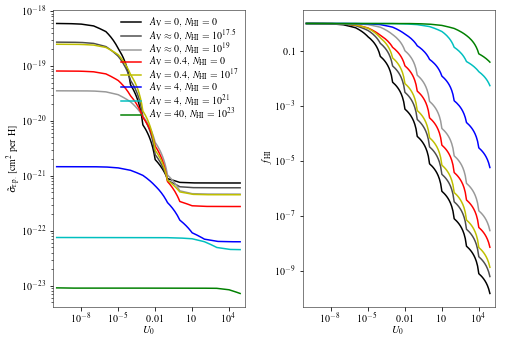

In [48]:
weightedOpacity((dustOptOpacityTable, dustIonOpacityTable, gasIonOpacityTable,fHITable))
u.mysavefig('weightedOpacities')

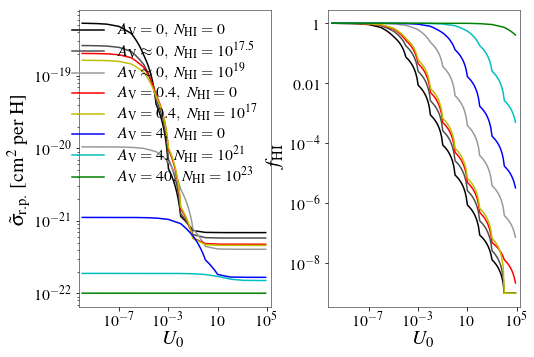

In [95]:
#calculation on Namekata Table
#notice AV=40, NH=1e23 is a factor of x10 higher than in Cloudy-based calculation`
weightedOpacity((dustOptOpacityTable, dustIonOpacityTable, gasIonOpacityTable,fHITable))

Figure 3: weighted opacities
* dust optical opacity increases with increasing A_V, fix. check also for gas ion opacity
* why do we need three different opacities, and not just one table for all?
* add temperature dependence of opacity
* in code 
    * how are fluxOpt and fluxIon calculated? do they depend on previous flux or just on NH and NHI?
    * possible bug -- geometric attenuation goes into absorbed flux
    * what happens at tau<1e-5?
    * U0 should be calculated from FluxIon0, not FluxIon
* interpolation looks weird
* verify factor of 100 dust to gas ratio
* use of U is confusing in this context
* in two left panels, change T=10^4K to T=T_eq
* show T-dependence?
* currently L_opt and L_ion ratio are calculated for unabsorbed spectrum. Their ratios can be different in absorbed spectrum

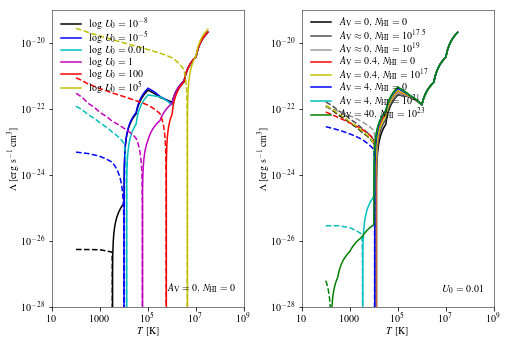

In [19]:
cooling(netCoolingTable,baseU0=0.01)
u.mysavefig('coolingFunc')    

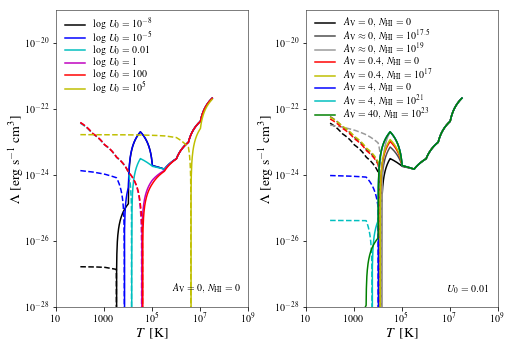

In [97]:
#Namekata based calculation
u.labelsize(False)
cooling(netCoolingTable,baseU0=0.01)

Figure 4: cooling
* double check cooling functions
* interpolation looks weird
* increase of lambda with T at T~10K is suspicious
* add absolute cooling?
* At maximum optical depth T_eq is still 3000K
* maybe add T_eq vs. (U0, AV, NHI)

In [11]:
netCoolingTable.minVals

[1e-10, 100.0, 1e+18, 1000000000000000.0]

(1e+20, 1e+23)

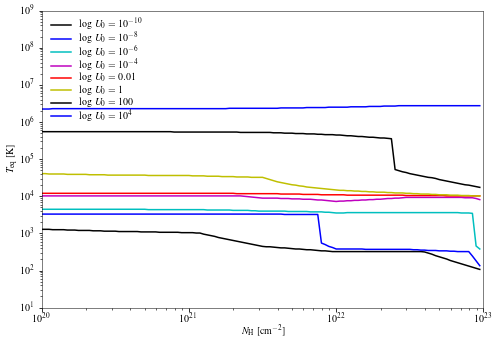

In [29]:
execfile('pysrc/RPC_Hydro.py')
Teq(netCoolingTable,byNH=True)
u.xlim(1e20,1e23)

IndexError: index 550 is out of bounds for axis 0 with size 550

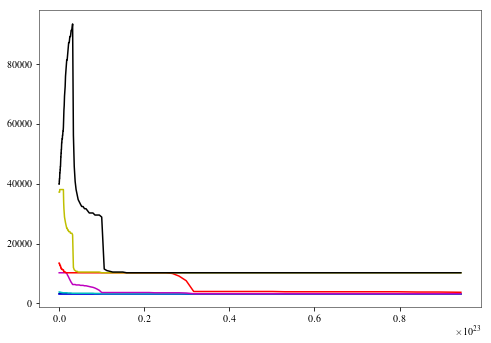

In [63]:
#Namekata based cooling table
Teq(netCoolingTable,byNH=True)
u.xlim(1e20,1e23)

In [64]:
pdb.pm()

> /home/jonathan/Dropbox/otherRepositories/rpc_hydro/pysrc/RPC_Hydro.py(188)Teq()
-> Teqs[iNH] = Ts[u.searchsorted(coolings,0.)]
(Pdb) p NH
1e+19
(Pdb) p NHI
*** NameError: NameError("name 'NHI' is not defined",)
(Pdb) p coolings
array([-4.53100000e-23, -4.49065692e-23, -4.45031385e-23, -4.40997077e-23,
       -4.36962769e-23, -4.32928462e-23, -4.28894154e-23, -4.24859846e-23,
       -4.20825538e-23, -4.16791231e-23, -4.12756923e-23, -4.08722615e-23,
       -4.04688308e-23, -4.00654000e-23, -3.96619692e-23, -3.92585385e-23,
       -3.88551077e-23, -3.84516769e-23, -3.80482462e-23, -3.76448154e-23,
       -3.72413846e-23, -3.68379538e-23, -3.64345231e-23, -3.60310923e-23,
       -3.56276615e-23, -3.52242308e-23, -3.48208000e-23, -3.44173692e-23,
       -3.40139385e-23, -3.36105077e-23, -3.32070769e-23, -3.28036462e-23,
       -3.24002154e-23, -3.19967846e-23, -3.15933538e-23, -3.11899231e-23,
       -3.07864923e-23, -3.03830615e-23, -2.99796308e-23, -2.95762000e-23,
       -2.91727692e-

(1000000000000000.0, 1e+23)

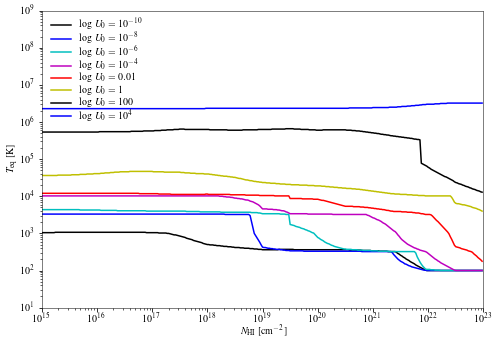

In [30]:
execfile('pysrc/RPC_Hydro.py')
Teq(netCoolingTable,byNH=False)
u.xlim(1e15,1e23)

In [32]:
np.log10(6.3e-18)

-17.200659450546418

In [25]:
pdb.pm()

> /home/jonathan/Dropbox/otherRepositories/rpc_hydro/pysrc/RPC_Hydro.py(194)Teq()
-> Teqs[iNHI] = Ts[u.searchsorted(coolings,0.)]
(Pdb) p NHI
3.162277660168845e+19
(Pdb) 
3.162277660168845e+19
(Pdb) q


In [26]:
netCoolingTable(1e-10,10.,10.,3e19)

-1.0

In [13]:
heatingTable, coolingTable= [
    pp.Table.Table(('U0','T','NH','NHI','T'),projectDir+'data/output_table.txt',firstLine=1,calculatedValueColumn=i)
    for i in (4,5)]

pysrc/Table.py:45: RuntimeWarning: invalid value encountered in log10
  self.propertyValues.append( array(sorted(unique([log(d[iProp]) for d in data])) ) )
/home/jonathan/.local/lib/python2.7/site-packages/numpy/core/_methods.py:29: RuntimeWarning: invalid value encountered in reduce
  return umr_minimum(a, axis, None, out, keepdims)
/home/jonathan/.local/lib/python2.7/site-packages/numpy/core/_methods.py:26: RuntimeWarning: invalid value encountered in reduce
  return umr_maximum(a, axis, None, out, keepdims)


MemoryError: 

In [26]:
import astropy.constants as cons
print cons.m_p.to('g').value / 0.73,  0.75e-21/448.16

2.29126287397e-24 1.67350946091e-24


In [34]:
grid = FromAbsorbedSpectra
ks = grid.keys()
lUs = lng-array([k[0] for k in ks])
Ts = array([k[2] for k in ks])
lNHs  = array([k[1][0] for k in ks])
lNHIs  = array([k[1][1] for k in ks])


In [85]:
vals = []
for lnH in grid.ns:
    for T in grid.electronTemps:
        lU=2.5-lnH
        good_inds = ((lUs==lU)*(Ts==T)).nonzero()[0]
        tri = matplotlib.tri.Triangulation(lNHs.take(good_inds), lNHIs.take(good_inds))  #Delanuy triangulation                        
        dlogN = 0.5
        vals.append(tri.get_trifinder()(22.95,22.5)==-1)
print u.mifkad(vals)

{False: 192}


array(112, dtype=int32)

In [63]:
1.7e-22*3.1*1e23

52.699999999999996

In [66]:
1.7e-22*3.1*0.7e23

36.89

In [101]:
sorted(badkeys, key=lambda x: (x[0],x[-1],x[1]))

[(-2.5, (21.461, 19.8), 4.0),
 (-2.5, (21.461, 19.8), 4.5),
 (-2.5, (21.461, 19.8), 5.0),
 (-2.5, (21.461, 19.8), 5.5),
 (-2.5, (22.758, 16.295), 5.5),
 (-2.5, (21.461, 19.8), 6.0),
 (-2.5, (22.998, 22.919), 6.5),
 (-2.5, (22.308, 15.322), 7.0),
 (-2.5, (22.998, 22.919), 7.0),
 (-2.5, (11.178, 11.175), 7.5),
 (-2.5, (12.249, 12.237), 7.5),
 (-2.5, (13.285, 13.239), 7.5),
 (-2.5, (13.831, 13.673), 7.5),
 (-2.5, (14.175, 13.673), 7.5),
 (-2.5, (14.375, 14.373), 7.5),
 (-2.5, (14.906, 13.633), 7.5),
 (-2.5, (15.558, 13.298), 7.5),
 (-2.5, (15.894, 15.892), 7.5),
 (-2.5, (16.331, 13.004), 7.5),
 (-2.5, (16.966, 16.954), 7.5),
 (-2.5, (17.136, 17.134), 7.5),
 (-2.5, (17.218, 12.77), 7.5),
 (-2.5, (17.251, 11.499), 7.5),
 (-2.5, (17.253, 5.2574), 7.5),
 (-2.5, (17.253, 6.2443), 7.5),
 (-2.5, (17.253, 7.3898), 7.5),
 (-2.5, (17.253, 8.6315), 7.5),
 (-2.5, (17.253, 10.004), 7.5),
 (-2.5, (17.468, 16.952), 7.5),
 (-2.5, (17.85, 16.552), 7.5),
 (-2.5, (18.786, 16.487), 7.5),
 (-2.5, (19.837, 16.

In [108]:
ls = u.filelines('data/output_table.txt')

In [114]:
badls = []
for l in u.Progress(ls):
    ss=string.split(l)
    if '-1' in ss:        
        if not float(ss[2])>float(ss[1]):
            if float(ss[1])!=1e23:
                badls.append(l)
u.out(badls)

progress:  99% 0 seconds passed


In [3]:
un.eV.to('erg')

1.6021766208e-12

In [1]:
## calculate Namekata Table
execfile('pysrc/RPC_Hydro.py')
import os

/home/jonathan/anaconda2/lib/python2.7/site-packages/h5py/__init__.py:34: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


In [2]:
lng=2.5; spectra = u.pickle.load(file('data/AbsorbedSpectra.pckl'))

In [3]:
FromAbsorbedSpectra  = Cloudy.Grid('FromAbsorbedSpectra', 
                                   emissionLines=Cloudy.emissionLines[:7], #BPT lines
                                   colDenss=[12],
                                   savelevel=0,
                                   electronTemps=arange(2.,7.6,.5),
                                   ns=lng-arange(-10,5.1),
                                   Us=[None],nuFnus=[1.2175],nuFnu_freq=10000.,
                                   dusties=[True],Zs=[1.],ps=[False],
                                   SEDs=spectra, 
                                   SEDkeyfunc = lambda sed: tuple(map(lambda v: u.nSignificantDigits(v,5),sed.key)), 
                                   SEDstrfunc = lambda sed: '%.3f_%.3f'%(sed.key[0],sed.key[1]),
                                   )


# create Namekata-based table
* INPUT: U0,T,NH, NHI
* OUTPUT: Dust Optical Opacity, Dust Ion Opacity, Gas Ion Opacity, f_HI, heating/cooling
* only thing taken from Cloudy is grain opacities
* spectral slope = -1.6
* spectrum depends on A_V(N_H), NHI
* dust opacity is freq-averaged sigma (divided into optical and ionizing)
* gas ionizing opacity is based on HI absorption -- 6.3e-18 (nu/nu_0)^-3 cm^2
* T-dependent HI recombination rate and collisonal ionization rate
* f_HI derived from recomb, collisional and photoionization rate
* cooling includes: PI heating of HI, HII recombination cooling, free-free, collisional and excitation cooling of HI, gas grain heating-cooling
* what about metal cooling???

In [88]:
pp.Table.createNamekataTable(FromAbsorbedSpectra,lng)

progress:  100% 43 seconds passed


In [ ]:
m = FromAbsorbedSpectra.values()[100]
m.loadAll()

In [92]:
reload(pp.Table)

<module 'Table' from 'pysrc/Table.py'>

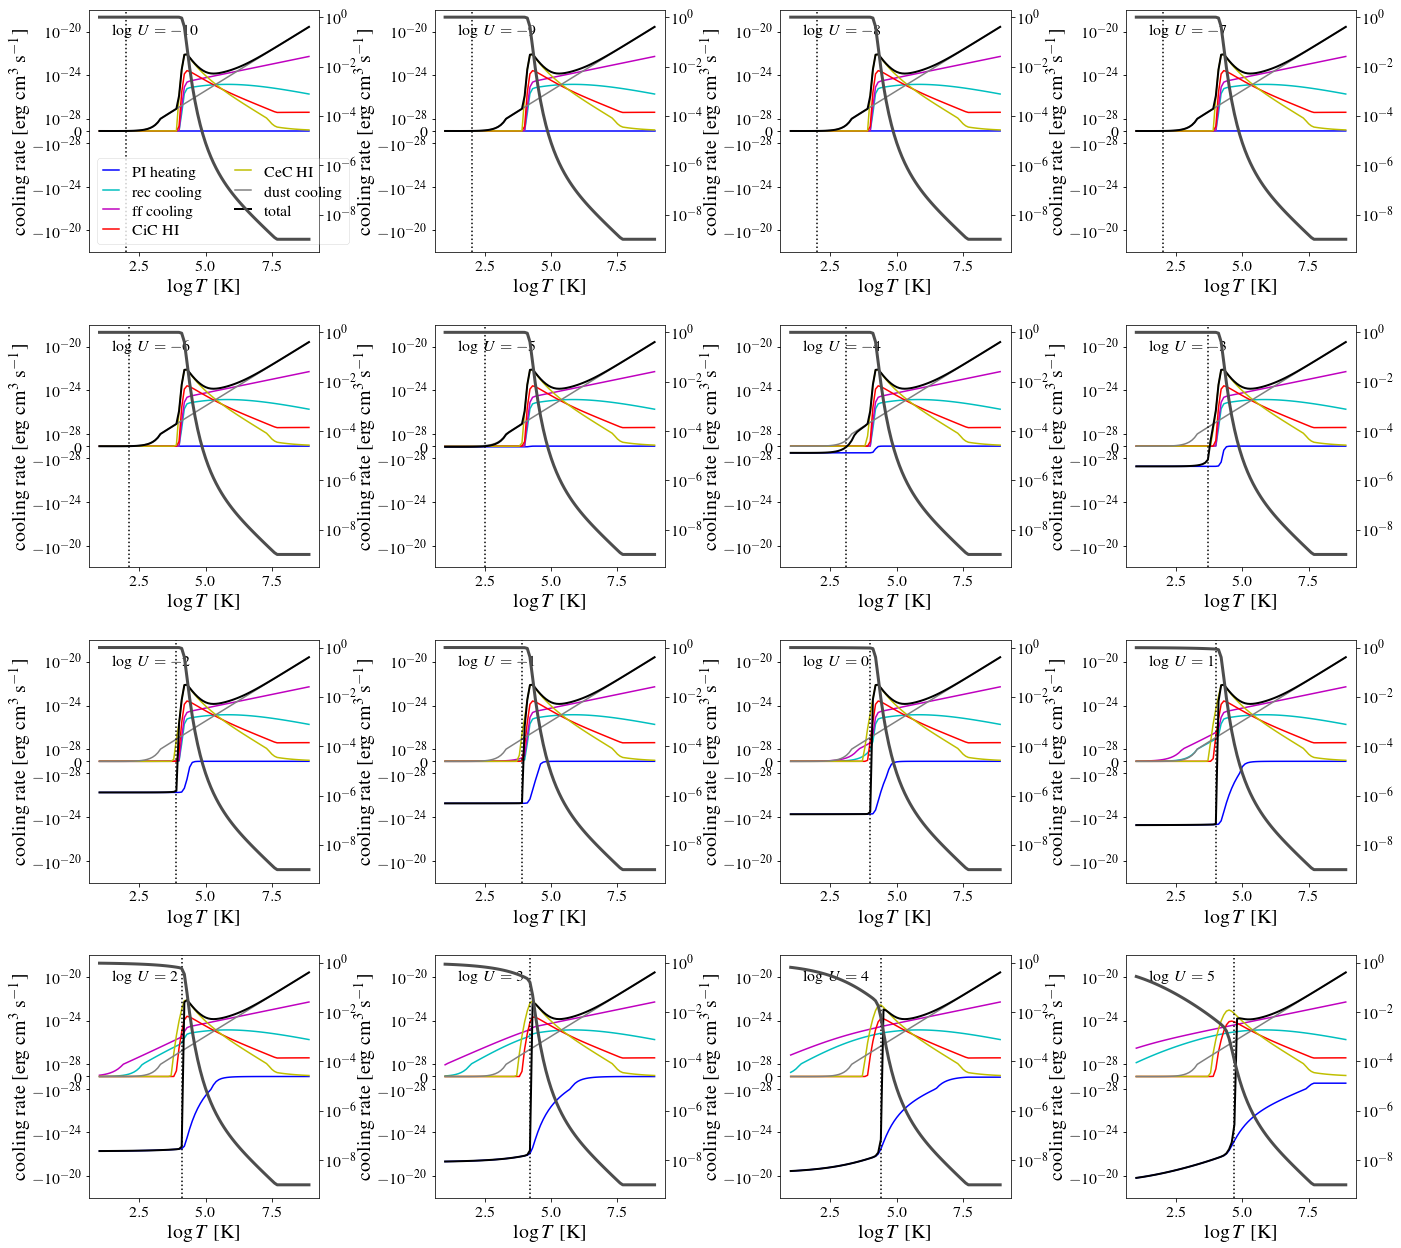

In [93]:
pp.Table.testNamekataEnergetics(22.,22.,m)

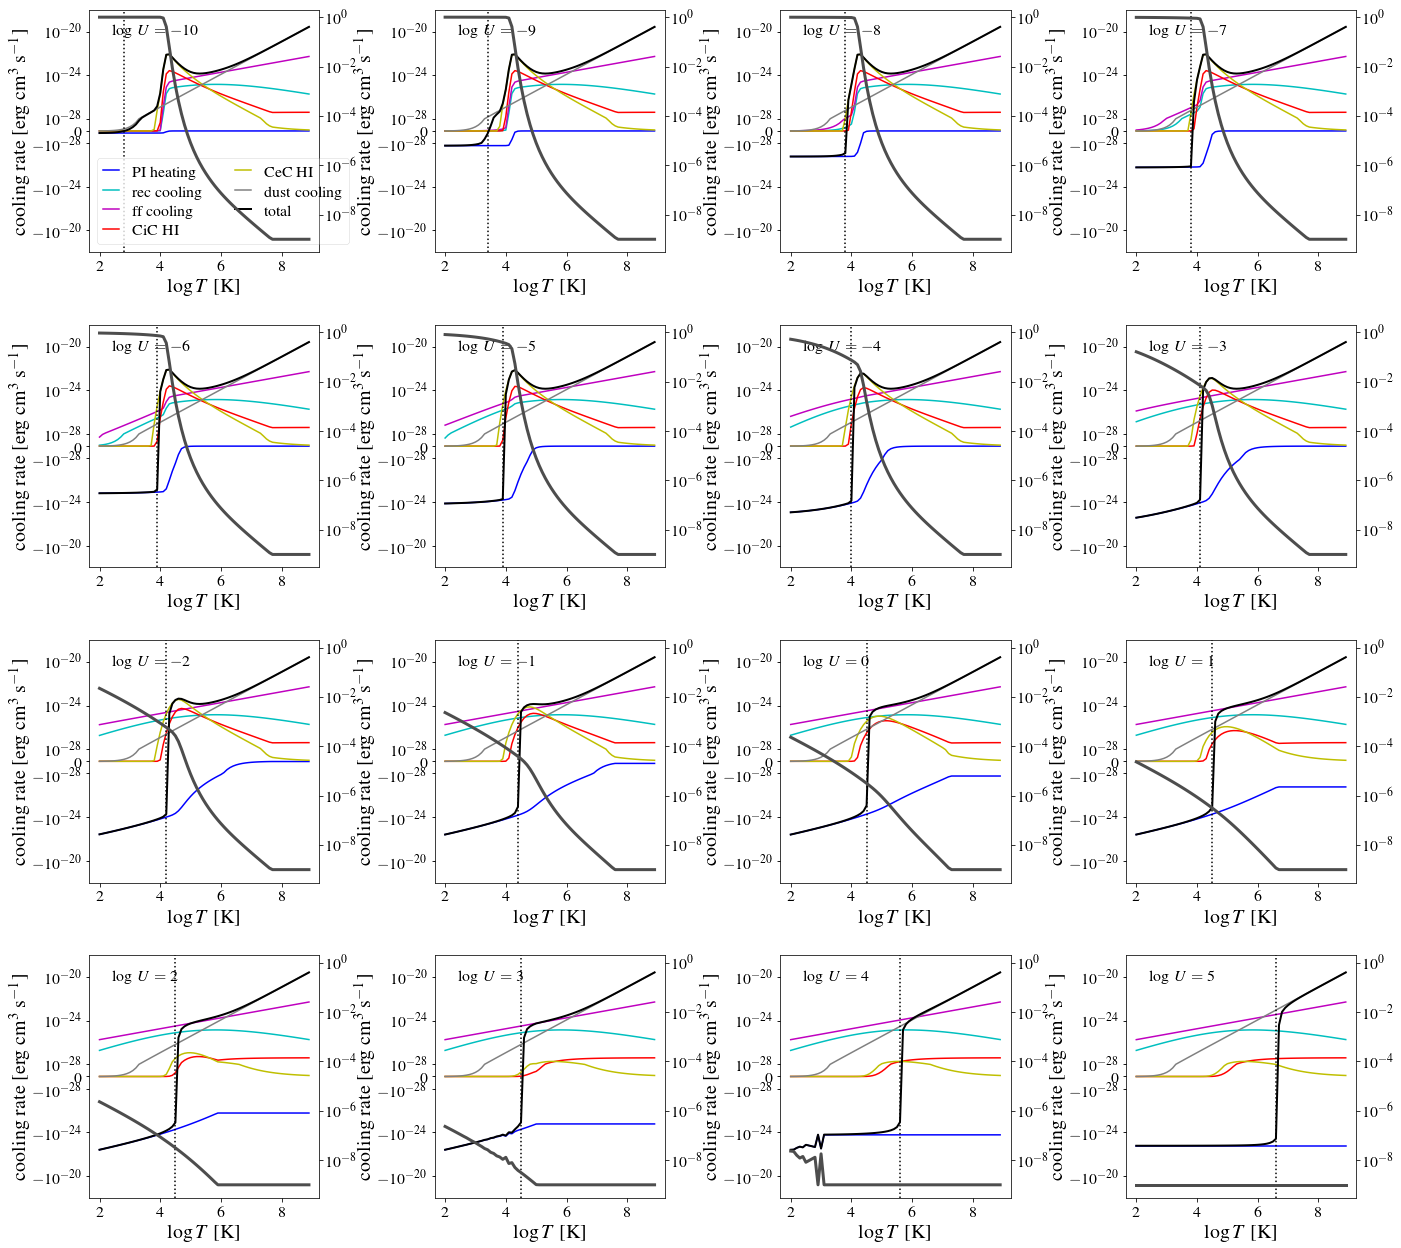

In [87]:
pp.Table.testNamekataEnergetics(0.,0.,m)